# Exploration of the shipfix data

In [2]:
fdir = '/home/jovyan/persistent//data/shipfix'
!ls -alrth {fdir}

fdir_export = '/home/jovyan/persistent//data/shipfix/export_data'
!ls -alrth {fdir_export}

fdir_import = '/home/jovyan/persistent//data/shipfix/import_data'
!ls -alrth {fdir_import}

fdir_port_activity = '/home/jovyan/persistent//data/shipfix/port_activity'
!ls -alrth {fdir_port_activity}

total 3.6G
-rwxr-xr-x 1 jovyan 1000 307K Apr 29 15:36  tradeflows_stacked.xlsx
-rwxr-xr-x 1 jovyan 1000 384K Apr 29 15:36  Shipfix+-+Data+Normalisation+Process.pdf
-rwxr-xr-x 1 jovyan 1000  83K Apr 29 15:36 'port_activity_stacked - SF.xlsx'
-rwxr-xr-x 1 jovyan 1000  68K Apr 29 15:36 'port_activity_stacked - Sevastopol.xlsx'
-rwxr-xr-x 1 jovyan 1000  83K Apr 29 15:36 'port_activity_stacked - NY.xlsx'
-rwxr-xr-x 1 jovyan 1000  86K Apr 29 15:36 'port_activity_stacked - New Orleans.xlsx'
-rwxr-xr-x 1 jovyan 1000  88K Apr 29 15:36 'port_activity_stacked - Louisiana.xlsx'
-rwxr-xr-x 1 jovyan 1000  85K Apr 29 15:36 'port_activity_stacked - Long Beach.xlsx'
-rwxr-xr-x 1 jovyan 1000  76K Apr 29 15:36 'port_activity_stacked - Kherson.xlsx'
-rwxr-xr-x 1 jovyan 1000  86K Apr 29 15:36 'port_activity_stacked - Houston.xlsx'
-rwxr-xr-x 1 jovyan 1000  81K Apr 29 15:36 'port_activity_stacked - Hampton Roads.xlsx'
-rwxr-xr-x 1 jovyan 1000  81K Apr 29 15:36 'port_activity_stacked - Beaumont.xlsx'
-rwxr-x

In [3]:
import pandas 

# content of excel data

In [4]:
from glob import glob
from tqdm.notebook import tqdm
from collections import namedtuple
import warnings
import os
import re

FSCC = namedtuple('FSC', ['file', 'name', 'shape', 'columns', 'content'])

#fname = 'demand - all_voyage_orders_by_cargo_type_time_series_stacked - size.xlsx'

files_content_lst = []
files_content_lst_2 = []
for fname in tqdm(glob(fdir_port_activity + '/*.xlsx')):
    
    # Replace 'your_file.xlsx' with the path to your Excel file
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module=re.escape('openpyxl.styles.stylesheet'))
        df = pandas.read_excel(fname, engine='openpyxl')
    files_content_lst_2.append(
        FSCC(fname, os.path.basename(fname).split('.')[0], df.shape, df.columns, df)
    )

for fname in tqdm(glob(fdir_export + '/*.xlsx')):
    
    # Replace 'your_file.xlsx' with the path to your Excel file
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module=re.escape('openpyxl.styles.stylesheet'))
        df = pandas.read_excel(fname, engine='openpyxl')
    files_content_lst.append(
        FSCC(fname, os.path.basename(fname).split('.')[0], df.shape, df.columns, df)
    )
for fname in tqdm(glob(fdir_import + '/*.xlsx')):
    
    # Replace 'your_file.xlsx' with the path to your Excel file
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module=re.escape('openpyxl.styles.stylesheet'))
        df = pandas.read_excel(fname, engine='openpyxl')
    files_content_lst.append(
        FSCC(fname, os.path.basename(fname).split('.')[0], df.shape, df.columns, df)
    )

for fname in tqdm(glob(fdir + '/*.xlsx')):
    
    # Replace 'your_file.xlsx' with the path to your Excel file
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module=re.escape('openpyxl.styles.stylesheet'))
        df = pandas.read_excel(fname, engine='openpyxl')
    files_content_lst.append(
        FSCC(fname, os.path.basename(fname).split('.')[0], df.shape, df.columns, df)
    )
    


class FileContainer:
    content = files_content_lst
    @classmethod
    def get(cls, name=None):
        if name is None:
            return [f.name for f in cls.content]
        else:
            for f in cls.content:
                if f.name == name:
                    return f
            return None
    @classmethod
    def pprint(cls):
        txt_lst = []
        for f in files_content_lst:
            txt_lst.append(f">>> {f.name}:\n {f.columns.values}")
        return "\n".join(txt_lst)
    @classmethod
    def iterate(cls):
        for f in files_content_lst:
            yield(f)
    @classmethod
    def update(cls, content):
        cls.content = content

class FileContainer2:
    content = files_content_lst_2
    @classmethod
    def get(cls, name=None):
        if name is None:
            return [f.name for f in cls.content]
        else:
            for f in cls.content:
                if f.name == name:
                    return f
            return None
    @classmethod
    def pprint(cls):
        txt_lst = []
        for f in files_content_lst_2:
            txt_lst.append(f">>> {f.name}:\n {f.columns.values}")
        return "\n".join(txt_lst)
    @classmethod
    def iterate(cls):
        for f in files_content_lst_2:
            yield(f)
    @classmethod
    def update(cls, content):
        cls.content = content

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

India          1.081445e+06
Other          8.579883e+05
China          7.097834e+05
Vietnam        1.685493e+05
Japan          1.316502e+05
South Korea    1.305631e+05
Brazil         1.045033e+05
Thailand       8.860279e+04
Turkey         7.606166e+04
Philippines    6.599050e+04
Indonesia      6.574727e+04
Name: mean, dtype: float64


<Axes: title={'center': 'pays importateur du Coal'}, xlabel='Date'>

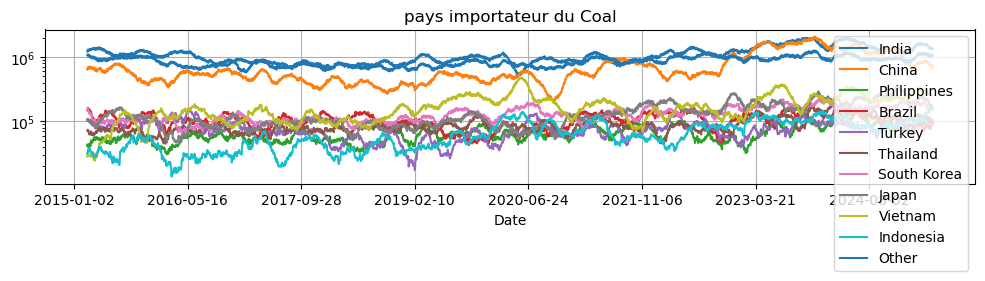

In [5]:

coal_import_df = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_coal import').content

coal_import_df.head(7)


print(coal_import_df.describe().iloc[1].sort_values(ascending=False))

coal_import_df.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='pays importateur du Coal')

In [6]:

df_africa = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_mine_africa_to').content
df_sud_america = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_mine_amerique_sud_to').content
df_pacific = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_mine_pacifique_to').content



df_pacific_in = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_mine_pacifique_to').content


MA 90 Days           1.027918e+08
All cargoes          9.876584e+07
Liquid & Gas         3.827640e+07
Other minor bulks    2.134807e+07
Coal                 1.187744e+07
Iron ore             9.190985e+06
Agri                 6.366238e+06
Project              5.533650e+06
Minerals             2.747943e+06
Ferts                1.439121e+06
Steels               1.357622e+06
Forestry             5.187454e+05
Minor ores & conc    1.096177e+05
Name: mean, dtype: float64


<Axes: title={'center': 'trade flow'}, xlabel='Date'>

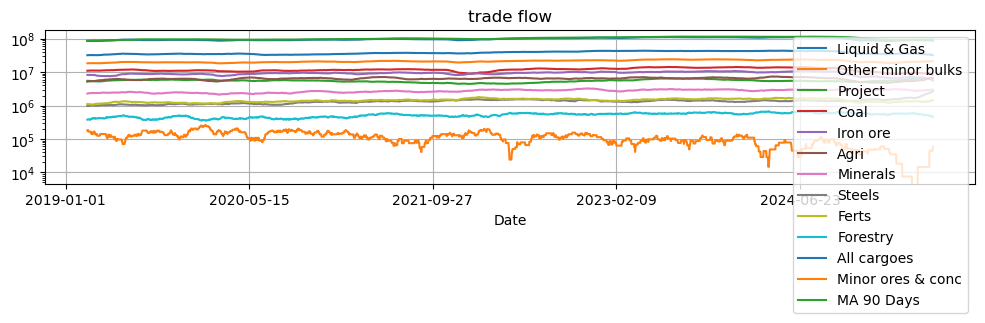

In [7]:
trade_df = FileContainer.get('tradeflows_stacked-4').content

trade_df.head(7)


print(trade_df.describe().iloc[1].sort_values(ascending=False))

trade_df.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='trade flow')

# tradeflow

# coal importing country

India          1.081445e+06
Other          8.579883e+05
China          7.097834e+05
Vietnam        1.685493e+05
Japan          1.316502e+05
South Korea    1.305631e+05
Brazil         1.045033e+05
Thailand       8.860279e+04
Turkey         7.606166e+04
Philippines    6.599050e+04
Indonesia      6.574727e+04
Name: mean, dtype: float64
India         54873.717169
Other         31959.721363
China         18375.012582
Vietnam       17054.974050
Bangladesh     5666.392398
Thailand       3878.376409
Taiwan         3835.295151
Indonesia      3761.941284
Egypt          3204.605505
Turkey         2922.595806
Brazil         2816.553080
Name: mean, dtype: float64


<Axes: title={'center': 'pays importateur du Coal'}, xlabel='Date'>

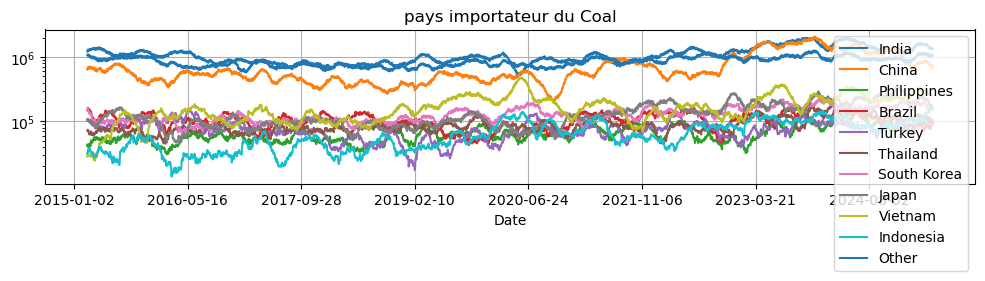

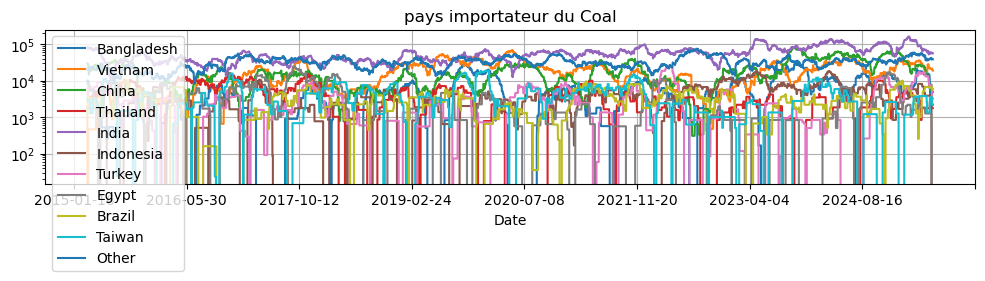

In [8]:
coal_export_df = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_coal export').content
coal_import_df = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_coal import').content

steamcoal_export_df = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_steamcoal export').content
steamcoal_import_df = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_steamcoal import').content
coal_import_df.head(7)


print(coal_import_df.describe().iloc[1].sort_values(ascending=False))
print(steamcoal_import_df.describe().iloc[1].sort_values(ascending=False))

coal_import_df.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='pays importateur du Coal')
steamcoal_import_df.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='pays importateur du Coal')

# coal exporting country

Indonesia     1.367806e+06
Australia     6.080113e+05
Other         3.383031e+05
SAFR          2.677595e+05
US            2.676640e+05
Russia        2.445743e+05
China         1.021539e+05
Colombia      1.009883e+05
Mozambique    6.953061e+04
India         6.714100e+04
Canada        4.610642e+04
Name: mean, dtype: float64


<Axes: title={'center': 'pays exportateur du Coal'}, xlabel='Date'>

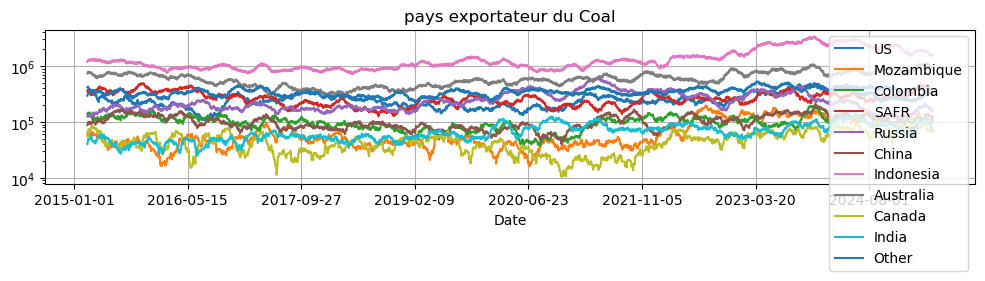

In [18]:

print(coal_export_df.describe().iloc[1].sort_values(ascending=False))
coal_export_df.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='pays exportateur du Coal')



# Iron ore importing country

China          476383.202611
Other          179174.056136
India           60695.071279
Japan           44416.723499
Netherlands     25596.120888
Egypt           22448.873890
Turkey          17366.026110
Germany         14757.854830
Argentina       14295.121932
Brazil          13375.531332
France          10327.603655
Name: mean, dtype: float64


<Axes: title={'center': 'pays importateur du Iron ore'}, xlabel='Date'>

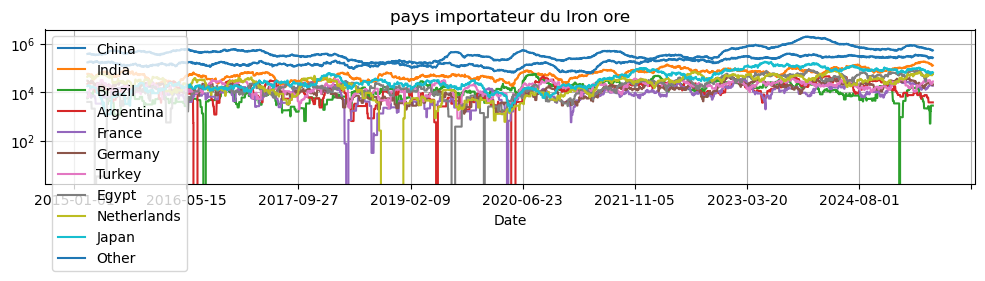

In [10]:
iron_export_df = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_iron_ore export').content
iron_import_df = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_iron_ore import').content

iron_import_df.head(7)


print(iron_import_df.describe().iloc[1].sort_values(ascending=False))

iron_import_df.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='pays importateur du Iron ore')

# iron ore exporting country

Other        238945.622715
India        221262.915144
Australia    111420.561619
Brazil        99018.303394
SAFR          43002.809138
Iran          38640.008877
Canada        35910.707050
China         33877.053003
Venezuela     20238.175979
Malaysia      18697.051697
Peru          17822.977546
Name: mean, dtype: float64


<Axes: title={'center': 'pays exportateur du Iron ore'}, xlabel='Date'>

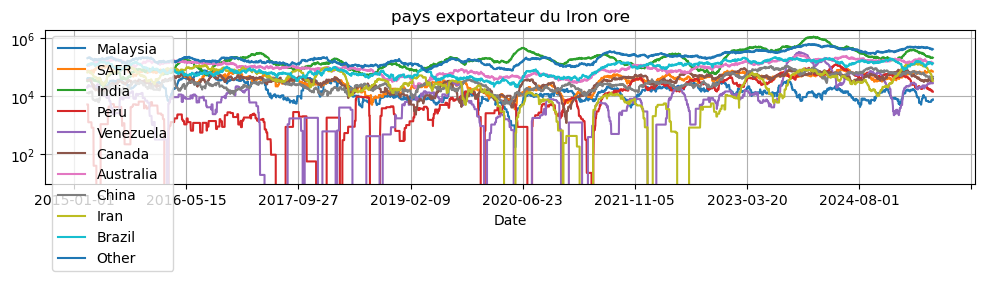

In [11]:
iron_export_df.head(7)
print(iron_export_df.describe().iloc[1].sort_values(ascending=False))
iron_export_df.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='pays exportateur du Iron ore')

# common exporting good from India China Vietnam Japan and South Koreal : Project

All cargoes          2.075036e+06
Liquid & Gas         8.808724e+05
Other minor bulks    4.263850e+05
Coal                 2.511672e+05
Iron ore             1.561050e+05
Project              1.069960e+05
Minerals             9.856295e+04
Agri                 7.621223e+04
Ferts                4.595759e+04
Steels               2.344712e+04
Minor ores & conc    5.590861e+03
Forestry             3.739394e+03
Name: mean, dtype: float64
{'All cargoes': 3648170.580054555, 'Other minor bulks': 1012507.8849120392, 'Liquid & Gas': 836600.3489788005, 'Coal': 787317.7765995993, 'Project': 437611.8909000879, 'Iron ore': 187753.07982237166, 'Minerals': 118914.62318088507, 'Agri': 112750.9917614152, 'Steels': 80723.06453475032, 'Ferts': 43469.02008324909, 'Forestry': 26283.828861758473, 'Minor ores & conc': 4238.0704658109335}


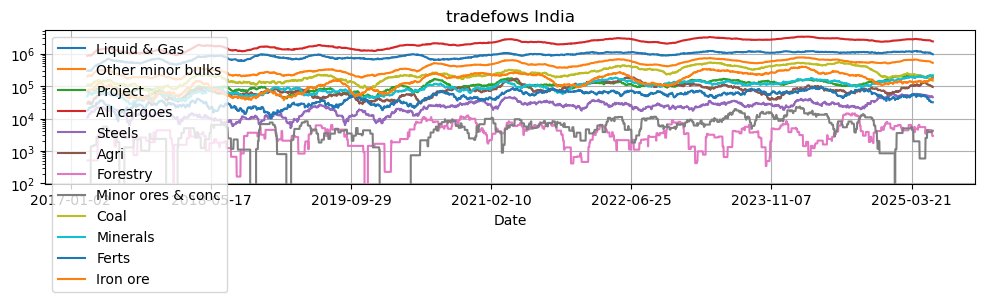

In [12]:
import numpy as np
df_india_tradeflows=FileContainer.get('tradeflows_stacked_India').content
df_india_tradeflows=df_india_tradeflows.drop('MA 90 Days',axis=1)
#print('India \n')
print(df_india_tradeflows.describe().iloc[1].sort_values(ascending=False))
df_india_tradeflows.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='tradefows India')
#print('\n')

df_china_tradeflows=FileContainer.get('tradeflows_stacked_China').content
df_china_tradeflows=df_china_tradeflows.drop('MA 90 Days',axis=1)
#print('China \n')
#print(df_china_tradeflows.describe().iloc[1].sort_values(ascending=False))
#df_china_tradeflows.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='tradefows China')
#print('\n')

df_vietnam_tradeflows=FileContainer.get('tradeflows_stacked_Vietnam').content
df_vietnam_tradeflows=df_vietnam_tradeflows.drop('MA 90 Days',axis=1)
#print('Vietnam \n')
#print(df_vietnam_tradeflows.describe().iloc[1].sort_values(ascending=False))
#df_vietnam_tradeflows.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='tradefows Vietnam')
#print('\n')

df_japan_tradeflows=FileContainer.get('tradeflows_stacked_Japan').content
df_japan_tradeflows=df_japan_tradeflows.drop('MA 90 Days',axis=1)
#print('Japan \n')
#print(df_japan_tradeflows.describe().iloc[1].sort_values(ascending=False))
#df_japan_tradeflows.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='tradefows Japan')
#print('\n')

df_SK_tradeflows=FileContainer.get('tradeflows_stacked_SK').content
df_SK_tradeflows=df_SK_tradeflows.drop('MA 90 Days',axis=1)
#print('South Korea \n')
#print(df_SK_tradeflows.describe().iloc[1].sort_values(ascending=False))
#df_SK_tradeflows.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='tradefows South Korea')


common_trades=[df_india_tradeflows.describe().iloc[1].sort_values(ascending=False),df_china_tradeflows.describe().iloc[1].sort_values(ascending=False),df_vietnam_tradeflows.describe().iloc[1].sort_values(ascending=False), df_japan_tradeflows.describe().iloc[1].sort_values(ascending=False), df_SK_tradeflows.describe().iloc[1].sort_values(ascending=False) ]
common_keys=set.intersection(*(set(d.keys()) for d in common_trades))
result = {key:np.mean([d[key] for d in common_trades]) for key in common_keys}

ordered_result=dict(sorted(result.items(),key=lambda x: x[1], reverse=True))
print(ordered_result)

# agri exporting countries

Other        945484.528598
Brazil       384777.164795
US           382768.182815
Ukraine      249512.398276
Australia    191452.779838
Argentina    173444.229042
Uruguay      129432.839906
Russia       121103.200313
Thailand      96464.863933
India         87941.363803
France        68495.625490
Name: mean, dtype: float64


<Axes: title={'center': 'pays exportateur du Agri product'}, xlabel='Date'>

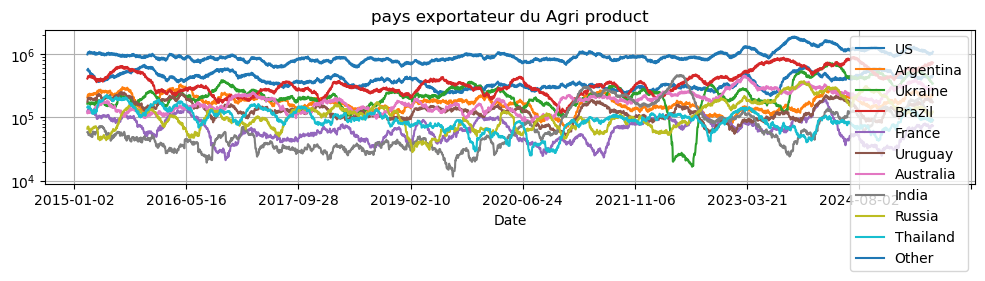

In [13]:
agri_export_df = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_agri export').content

print(agri_export_df.describe().iloc[1].sort_values(ascending=False))

agri_export_df.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='pays exportateur du Agri product')

# agri importing countries

Other        1.738956e+06
China        3.799492e+05
Japan        1.438357e+05
Egypt        1.134371e+05
Indonesia    7.903935e+04
Spain        7.564140e+04
Algeria      7.393881e+04
Morocco      6.739306e+04
Turkey       6.021258e+04
Italy        5.168108e+04
Brazil       4.679268e+04
Name: mean, dtype: float64


<Axes: title={'center': 'pays importateur du agri product'}, xlabel='Date'>

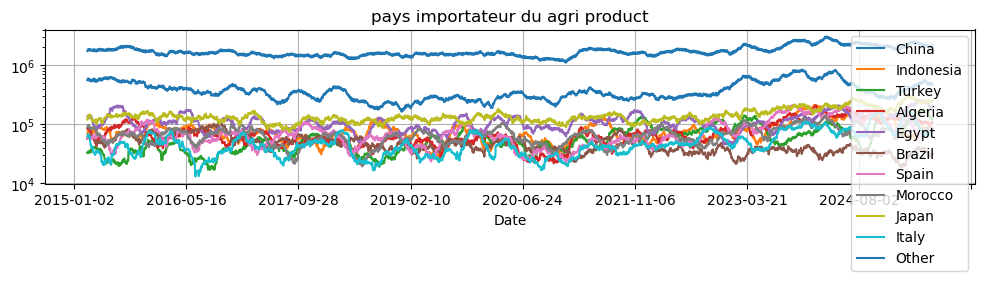

In [14]:
agri_import_df = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_agri import').content

print(agri_import_df.describe().iloc[1].sort_values(ascending=False))

agri_import_df.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='pays importateur du agri product')

# mineral importing countries

Other         523875.242361
China         224459.303735
India         210208.053800
Bangladesh    131268.625490
US             71282.243928
Indonesia      34574.414730
Vietnam        31600.053539
Italy          24859.176809
Spain          15697.494907
Turkey         11205.140768
Egypt           9770.165840
Name: mean, dtype: float64


<Axes: title={'center': 'pays importateur du minerals'}, xlabel='Date'>

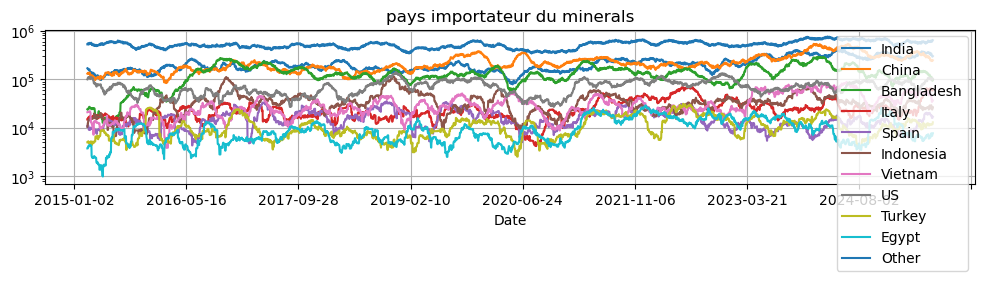

In [15]:
mineral_import_df = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_mineral import').content

print(mineral_import_df.describe().iloc[1].sort_values(ascending=False))

mineral_import_df.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='pays importateur du minerals')

# mineral exporting countries 

Other                   485484.692348
United Arab Emirates    192140.176286
India                   190204.658919
Oman                    107967.158266
Australia                57793.799164
Turkey                   53170.462784
Spain                    46174.213110
Egypt                    44058.513189
Vietnam                  43710.425437
Malaysia                 35490.105511
China                    32605.710891
Name: mean, dtype: float64


<Axes: title={'center': 'pays exportateur du minerals'}, xlabel='Date'>

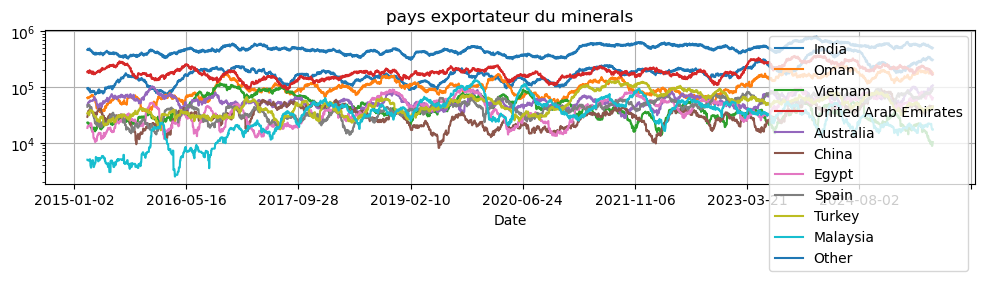

In [16]:
mineral_export_df = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_mineral export').content

print(mineral_export_df.describe().iloc[1].sort_values(ascending=False))

mineral_export_df.set_index('Date').rolling(60).mean().plot(figsize=(12,2), grid=True, logy=True, title='pays exportateur du minerals')